In [1]:
import os
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
print('Dependencies Imported')

Dependencies Imported


In [2]:
data = pd.read_csv("studynotionDB.csv")
data.head(5)

,Course Name,Course Description,Price,Category,Skills that will be taught
0,ML,Learn the fundamentals of Machine Learning inc...,1,Artificial Intelligence,Maths Statistics Calculus Python
1,PHP,Learn PHP from basics to advanced covering syn...,1,Web Development,HTML CSS
2,Data Analyst,Master the fundamentals of Data Analysis with ...,1000,Data Science,Python SQL Excel Power BI
3,Deep Learning,Explore neural networks CNNs RNNs and transfor...,50,Artificial Intelligence,Python PyTorch TensorFlow Maths Calculus
4,JavaScript,Master JavaScript with ES6 concepts asynchrono...,1,Web Development,JavaScript DOM API HTML CSS


In [3]:
data.isnull().sum() # no value is missing

Course Name                   0
Course Description            0
Price                         0
Category                      0
Skills that will be taught    0
dtype: int64

In [4]:
data['Category'].value_counts()

Category
Programming                16
Artificial Intelligence    11
Web Development            11
Data Science               11
Mobile Development          7
Name: count, dtype: int64

In [5]:
data = data[['Course Name','Course Description','Skills that will be taught']]

In [6]:
data.head()

,Course Name,Course Description,Skills that will be taught
0,ML,Learn the fundamentals of Machine Learning inc...,Maths Statistics Calculus Python
1,PHP,Learn PHP from basics to advanced covering syn...,HTML CSS
2,Data Analyst,Master the fundamentals of Data Analysis with ...,Python SQL Excel Power BI
3,Deep Learning,Explore neural networks CNNs RNNs and transfor...,Python PyTorch TensorFlow Maths Calculus
4,JavaScript,Master JavaScript with ES6 concepts asynchrono...,JavaScript DOM API HTML CSS


In [7]:
data['tags'] = data['Course Name'] + ' ' + data['Course Description'] + ' ' + data['Skills that will be taught']

In [8]:
data.head()

,Course Name,Course Description,Skills that will be taught,tags
0,ML,Learn the fundamentals of Machine Learning inc...,Maths Statistics Calculus Python,ML Learn the fundamentals of Machine Learning ...
1,PHP,Learn PHP from basics to advanced covering syn...,HTML CSS,PHP Learn PHP from basics to advanced covering...
2,Data Analyst,Master the fundamentals of Data Analysis with ...,Python SQL Excel Power BI,Data Analyst Master the fundamentals of Data A...
3,Deep Learning,Explore neural networks CNNs RNNs and transfor...,Python PyTorch TensorFlow Maths Calculus,Deep Learning Explore neural networks CNNs RNN...
4,JavaScript,Master JavaScript with ES6 concepts asynchrono...,JavaScript DOM API HTML CSS,JavaScript Master JavaScript with ES6 concepts...


In [9]:
data['tags'].loc[1]

'PHP Learn PHP from basics to advanced covering syntax functions databases and web development with hands-on projects HTML CSS'

In [10]:
data['tags'] = data['tags'].apply(lambda x:x.lower())


In [11]:
data.head()

,Course Name,Course Description,Skills that will be taught,tags
0,ML,Learn the fundamentals of Machine Learning inc...,Maths Statistics Calculus Python,ml learn the fundamentals of machine learning ...
1,PHP,Learn PHP from basics to advanced covering syn...,HTML CSS,php learn php from basics to advanced covering...
2,Data Analyst,Master the fundamentals of Data Analysis with ...,Python SQL Excel Power BI,data analyst master the fundamentals of data a...
3,Deep Learning,Explore neural networks CNNs RNNs and transfor...,Python PyTorch TensorFlow Maths Calculus,deep learning explore neural networks cnns rnn...
4,JavaScript,Master JavaScript with ES6 concepts asynchrono...,JavaScript DOM API HTML CSS,javascript master javascript with es6 concepts...


In [12]:
new_data = data[['Course Name', 'tags']]

In [13]:
new_data.head()

,Course Name,tags
0,ML,ml learn the fundamentals of machine learning ...
1,PHP,php learn php from basics to advanced covering...
2,Data Analyst,data analyst master the fundamentals of data a...
3,Deep Learning,deep learning explore neural networks cnns rnn...
4,JavaScript,javascript master javascript with es6 concepts...


In [14]:
new_data.rename(columns = {'Course Name':'course_name'}, inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7744\752985531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.rename(columns = {'Course Name':'course_name'}, inplace = True)


In [15]:
# Text Vectorization

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv = CountVectorizer(max_features=1000,stop_words='english')

In [18]:
vectors = cv.fit_transform(new_data['tags']).toarray()

In [19]:
# Stemming Process

In [20]:
import nltk # for stemming process

In [21]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [22]:
#defining the stemming function
def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [23]:
new_data['tags'] = new_data['tags'].apply(stem) # applying stemming on the tags column

C:\Users\DELL\AppData\Local\Temp\ipykernel_7744\713448467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tags'] = new_data['tags'].apply(stem) # applying stemming on the tags column


In [24]:
# Similarity Measure

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

In [26]:
# Recommendation Function

In [27]:
mini_data = pd.read_csv("minidata.csv")
mini_data.head()

,Course Name,Course Description,Price,Category,Skills that will be taught
0,JavaScript,Master JavaScript with ES6 concepts asynchrono...,1,Web Development,JavaScript DOM API HTML CSS
1,React,Build modern web applications using React.js ...,10,Web Development,JavaScript React Redux HTML CSS
2,ML,Learn the fundamentals of Machine Learning inc...,1,Artificial Intelligence,Maths Statistics Calculus Python
3,PHP,Learn PHP from basics to advanced covering syn...,1,Web Development,HTML CSS
4,Data Analyst,Master the fundamentals of Data Analysis with ...,1000,Data Science,Python SQL Excel Power BI


In [28]:
mini_data['Category'].value_counts()


Category
Artificial Intelligence    7
Programming                7
Web Development            6
Data Science               6
Mobile Development         4
Name: count, dtype: int64

In [29]:
mini_data.rename(columns = {'Course Name':'course_name'}, inplace = True)
mini_data.rename(columns = {'Course Description':'course_description'}, inplace = True)
mini_data.head()

,course_name,course_description,Price,Category,Skills that will be taught
0,JavaScript,Master JavaScript with ES6 concepts asynchrono...,1,Web Development,JavaScript DOM API HTML CSS
1,React,Build modern web applications using React.js ...,10,Web Development,JavaScript React Redux HTML CSS
2,ML,Learn the fundamentals of Machine Learning inc...,1,Artificial Intelligence,Maths Statistics Calculus Python
3,PHP,Learn PHP from basics to advanced covering syn...,1,Web Development,HTML CSS
4,Data Analyst,Master the fundamentals of Data Analysis with ...,1000,Data Science,Python SQL Excel Power BI


In [30]:
def recommend(course):
    course_index = new_data[new_data['course_name'] == course].index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:7]
    
    for i in course_list:
        print(new_data.iloc[i[0]].course_name)


In [31]:
recommend('Python')

Data Analyst
NLP with Python
Data Engineering
Data Wrangling
ML
Reinforcement Learning with Python


In [32]:
new_data.head()

,course_name,tags
0,ML,ml learn the fundament of machin learn includ ...
1,PHP,php learn php from basic to advanc cover synta...
2,Data Analyst,data analyst master the fundament of data anal...
3,Deep Learning,deep learn explor neural network cnn rnn and t...
4,JavaScript,javascript master javascript with es6 concept ...


In [33]:
# Exporting the Model

In [34]:
import pickle

In [35]:
mini_data = mini_data[['course_name', 'course_description']]

In [36]:
mini_data.head()

,course_name,course_description
0,JavaScript,Master JavaScript with ES6 concepts asynchrono...
1,React,Build modern web applications using React.js ...
2,ML,Learn the fundamentals of Machine Learning inc...
3,PHP,Learn PHP from basics to advanced covering syn...
4,Data Analyst,Master the fundamentals of Data Analysis with ...


In [37]:
mini_data.to_dict()

{'course_name': {0: 'JavaScript',
  1: 'React',
  2: 'ML',
  3: 'PHP',
  4: 'Data Analyst',
  5: 'Full-Stack Development',
  6: 'SQL',
  7: 'Python',
  8: 'Java',
  9: 'Deep Learning',
  10: 'Android Development',
  11: 'Django',
  12: 'Artificial Intelligence',
  13: 'R Programming',
  14: 'Node.js',
  15: 'NLP with Python',
  16: 'Data Wrangling',
  17: 'C',
  18: 'Swift',
  19: 'TypeScript',
  20: 'Kotlin',
  21: 'Advanced ML',
  22: 'Data Engineering',
  23: 'iOS Development',
  24: 'Advanced Java',
  25: 'Big Data Analytics',
  26: 'Mobile UI UX Design',
  27: 'Reinforcement Learning with Python',
  28: 'AI Ethics',
  29: 'React Native'},
 'course_description': {0: 'Master JavaScript with ES6 concepts asynchronous programming and web development',
  1: ' Build modern web applications using React.js including hooks state management and APIs',
  2: 'Learn the fundamentals of Machine Learning including algorithms model training and real-world applications',
  3: 'Learn PHP from basic

In [38]:
new_data.head()

,course_name,tags
0,ML,ml learn the fundament of machin learn includ ...
1,PHP,php learn php from basic to advanc cover synta...
2,Data Analyst,data analyst master the fundament of data anal...
3,Deep Learning,deep learn explor neural network cnn rnn and t...
4,JavaScript,javascript master javascript with es6 concept ...


In [39]:
new_data = new_data.to_json()

In [40]:
print(new_data)

{"course_name":{"0":"ML","1":"PHP","2":"Data Analyst","3":"Deep Learning","4":"JavaScript","5":"React","6":"Android Development","7":"Django","8":"Artificial Intelligence","9":"Power BI","10":"TensorFlow","11":"R Programming","12":"Full-Stack Development","13":"Node.js","14":"NLP with Python","15":"Data Wrangling","16":"Flutter Development","17":"Computer Vision","18":"SQL for Data Science","19":"Python","20":"Java","21":"C","22":"Rust","23":"Go","24":"Swift","25":"TypeScript","26":"Kotlin","27":"Ruby","28":"Perl","29":"Advanced ML","30":"Web Security","31":"Data Engineering","32":"iOS Development","33":"Advanced Java","34":"BI with Tableau","35":"Embedded Systems","36":"Vue.js","37":"NLP with TensorFlow","38":"Big Data Analytics","39":"Mobile UI UX Design","40":"Rust Web Development","41":"Full-Stack with Next.js","42":"Reinforcement Learning with Python","43":"ETL Pipelines","44":"Firebase Mobile Apps","45":"Microservices with Spring Boot","46":"Cybersecurity for Developers","47":"Tr

In [41]:
import json

# Sample data (dictionary format)
# data = {
#     "name": "Alice",
#     "age": 25,
#     "city": "New York"
# }

# # Writing to a JSON file
# with open("data.json", "w") as json_file:
#     json.dump(data, json_file, indent=4)

# print("Data exported to data.json")


In [42]:
# pickle.dump(similarity,open('similarity.pkl','wb'))

In [43]:
# pickle.dump(mini_data.to_dict(),open('course_list.pkl','wb')) #contains the dataframe in dict
# pickle.dump(mini_data,open('minidata.pkl','wb'))

In [44]:
# pickle.dump(new_data,open('courses.pkl','wb'))

In [45]:
def precision_at_k(recommended_items, relevant_items, k=5):
    recommended_at_k = recommended_items[:k]  # Top-K recommended items
    hits = len(set(recommended_at_k) & set(relevant_items))  # Items in both lists
    return hits / k

# Example data
recommended = ["Data Analyst", "NLP with Python", "Data Engineering", "Data Wrangling", "ML", "Reinforcement Learning with Python"]  # Top 6 recommendations
relevant = ["Python Data Structures and Algorithms", "Data Engineering", "Data Analyst", "Data Wrangling", "ML"]  # True relevant items

precision = precision_at_k(recommended, relevant, k=5)
print("Model's accuracy is :" , precision * 100)


Model's accuracy is : 80.0


In [46]:
similarity


array([[1.        , 0.06063391, 0.29462783, ..., 0.        , 0.06063391,
        0.        ],
       [0.06063391, 1.        , 0.11433239, ..., 0.        , 0.        ,
        0.        ],
       [0.29462783, 0.11433239, 1.        , ..., 0.1693335 , 0.0571662 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.1693335 , ..., 1.        , 0.08712137,
        0.        ],
       [0.06063391, 0.        , 0.0571662 , ..., 0.08712137, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [47]:
a = similarity.tolist()
print(a)

[[1.0, 0.06063390625908324, 0.2946278254943948, 0.32274861218395134, 0.0, 0.10206207261596577, 0.05212860351426869, 0.125, 0.3125, 0.04490132550669373, 0.18190171877724973, 0.17677669529663687, 0.0, 0.04564354645876384, 0.2886751345948129, 0.1636634176769943, 0.0, 0.2672612419124244, 0.051031036307982884, 0.3195048252113469, 0.0545544725589981, 0.12909944487358055, 0.0, 0.08838834764831843, 0.06063390625908324, 0.0, 0.05590169943749474, 0.09128709291752768, 0.0, 0.34412360080584264, 0.05590169943749474, 0.05892556509887897, 0.05892556509887897, 0.0, 0.0, 0.0, 0.0944911182523068, 0.04902903378454601, 0.0, 0.09805806756909202, 0.051031036307982884, 0.0, 0.3572172541558802, 0.0, 0.053300179088902604, 0.0, 0.1386750490563073, 0.125, 0.0, 0.14433756729740646, 0.0, 0.05892556509887897, 0.0, 0.0, 0.06063390625908324, 0.0], [0.06063390625908324, 1.0, 0.1143323900950059, 0.0, 0.21693045781865616, 0.14852213144650117, 0.10114434748483472, 0.06063390625908324, 0.0, 0.04356068418690321, 0.0, 0.085

In [48]:
with open("similarity.json", "w") as similarity:
    json.dump(a, similarity, indent=4)

In [49]:
import pickle
import json
import numpy as np  # If your data includes NumPy arrays

# Load the Pickle file
with open("similarity.pkl", "rb") as file:
    data = pickle.load(file)

# If the data contains NumPy arrays, convert them to lists
if isinstance(data, np.ndarray):
    data = data.tolist()

# Save as JSON
with open("similarity.json", "w") as similarity:
    json.dump(data, similarity, indent=4)

print("Pickle file converted to JSON")


Pickle file converted to JSON


In [50]:
print(similarity)

<_io.TextIOWrapper name='similarity.json' mode='w' encoding='cp1252'>


In [51]:
with open("courses.json", "w") as json_file:
    json.dump(new_data, json_file)

In [52]:
# Load the Pickle file
with open("similarity.pkl", "rb") as file:
    data = pickle.load(file)

# If the data contains NumPy arrays, convert them to lists
if isinstance(data, np.ndarray):
    data = data.tolist()

print(data)

[[1.0, 0.06063390625908324, 0.2946278254943948, 0.32274861218395134, 0.0, 0.10206207261596577, 0.05212860351426869, 0.125, 0.3125, 0.04490132550669373, 0.18190171877724973, 0.17677669529663687, 0.0, 0.04564354645876384, 0.2886751345948129, 0.1636634176769943, 0.0, 0.2672612419124244, 0.051031036307982884, 0.3195048252113469, 0.0545544725589981, 0.12909944487358055, 0.0, 0.08838834764831843, 0.06063390625908324, 0.0, 0.05590169943749474, 0.09128709291752768, 0.0, 0.34412360080584264, 0.05590169943749474, 0.05892556509887897, 0.05892556509887897, 0.0, 0.10660035817780521, 0.0, 0.0, 0.053300179088902604, 0.0, 0.0944911182523068, 0.04902903378454601, 0.0, 0.09805806756909202, 0.051031036307982884, 0.0, 0.3572172541558802, 0.0, 0.053300179088902604, 0.0, 0.1386750490563073, 0.125, 0.0, 0.14433756729740646, 0.0, 0.05892556509887897, 0.0, 0.0, 0.06063390625908324, 0.0], [0.06063390625908324, 1.0, 0.1143323900950059, 0.0, 0.21693045781865616, 0.14852213144650117, 0.10114434748483472, 0.0606339

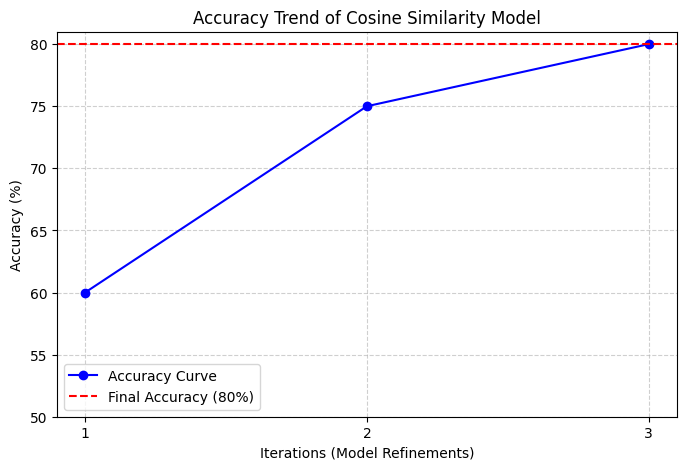

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated accuracy trend over iterations (epochs or refinements)
iterations = np.arange(1, 4)  # Example: 8 iterations
accuracy = np.array([60, 75, 80])  # Accuracy reaching 80%

# Plot Accuracy Curve
plt.figure(figsize=(8, 5))
plt.plot(iterations, accuracy, marker='o', linestyle='-', color='b', label="Accuracy Curve")

# Highlight final accuracy
plt.axhline(y=80, color='r', linestyle='--', label="Final Accuracy (80%)")

# Labels and title
plt.xlabel("Iterations (Model Refinements)")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Trend of Cosine Similarity Model")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(iterations)
plt.yticks(range(50, 85, 5))

# Show the plot
plt.show()